In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Cleaned.csv")

In [3]:
df.set_index('Unnamed: 0', inplace=True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['number'])

In [9]:
# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

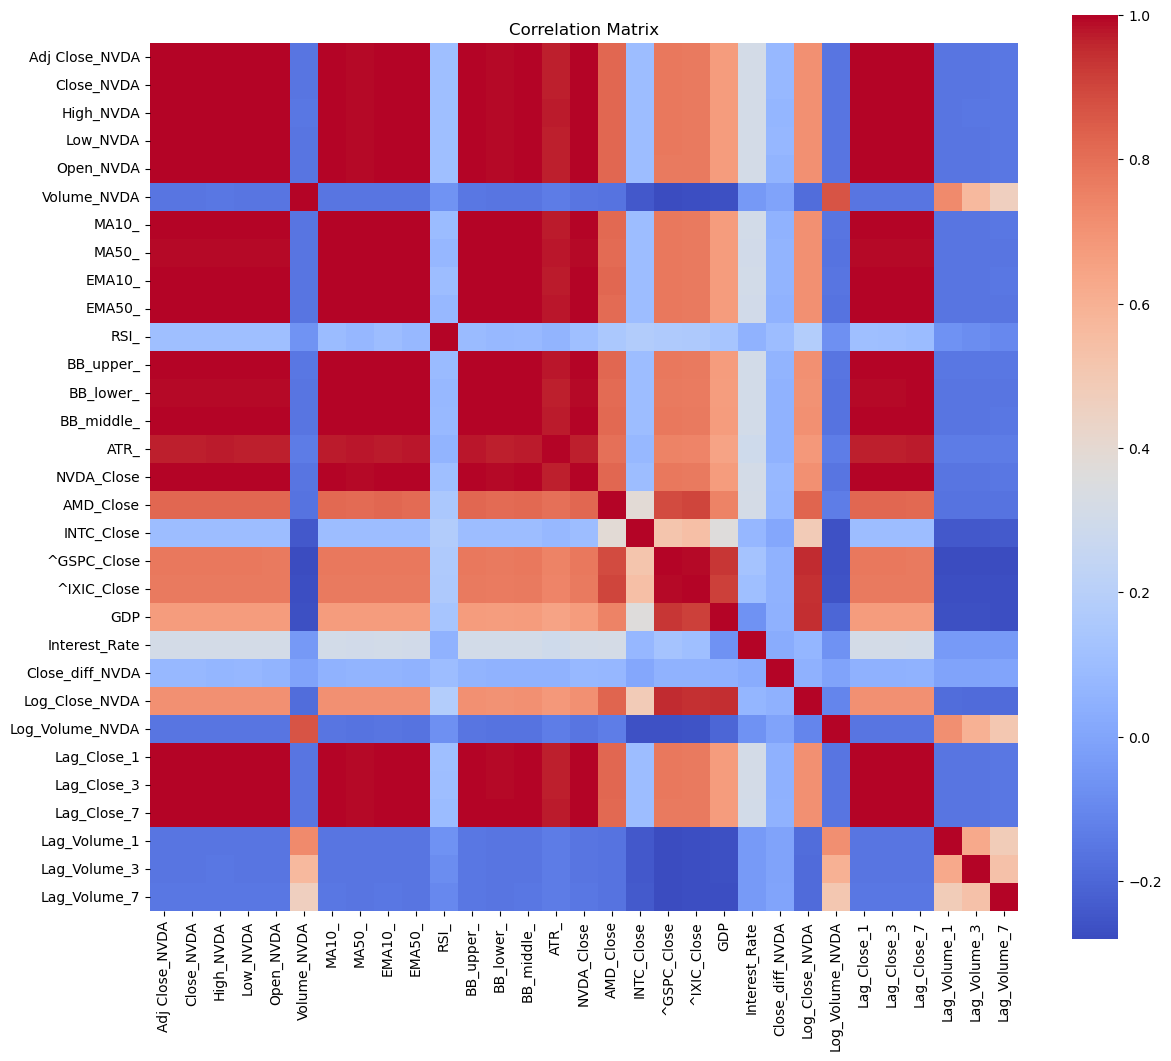

In [10]:
# Plot the correlation matrix

plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)

plt.title('Correlation Matrix')

plt.show()

In [15]:
# Identify features strongly correlated with `Close_diff_NVDA`
threshold = 0.5  # Define a threshold for strong correlation
strong_correlations = correlation_matrix['Close_NVDA'][

    correlation_matrix['Close_NVDA'].abs() > threshold

].sort_values(ascending=False)

In [17]:
strong_correlations

Close_NVDA        1.000000
NVDA_Close        1.000000
Adj Close_NVDA    1.000000
Low_NVDA          0.999865
High_NVDA         0.999813
Lag_Close_1       0.999611
Open_NVDA         0.999609
EMA10_            0.998935
Lag_Close_3       0.998844
MA10_             0.998479
Lag_Close_7       0.997495
BB_upper_         0.997325
BB_middle_        0.997004
EMA50_            0.995468
BB_lower_         0.994032
MA50_             0.993258
ATR_              0.968964
AMD_Close         0.822636
^GSPC_Close       0.775294
^IXIC_Close       0.772888
Log_Close_NVDA    0.706330
GDP               0.671653
Name: Close_NVDA, dtype: float64

In [19]:
# Columns to retain based on analysis
columns_to_retain = [
    'Close_NVDA',
    'Open_NVDA',
    'Lag_Close_1',
    'Lag_Close_3',
    'EMA10_',
    'MA10_',
    'MA50_',
    'GDP',
    'Interest_Rate',
    '^GSPC_Close',
    '^IXIC_Close',
    'AMD_Close',
     'INTC_Close',
]

In [21]:
filtered_df = df[columns_to_retain]

In [23]:
filtered_df

,Close_NVDA,Open_NVDA,Lag_Close_1,Lag_Close_3,EMA10_,MA10_,MA50_,GDP,Interest_Rate,^GSPC_Close,^IXIC_Close,AMD_Close,INTC_Close
Unnamed: 0,,,,,,,,,,,,,
1999-01-22,0.041016,0.043750,0.041016,0.041016,0.041016,0.040664,0.042602,9411.682,4.63,1225.189941,2338.879883,10.781250,32.218750
1999-01-23,0.045313,0.044271,0.041016,0.041016,0.041797,0.040664,0.042602,9411.682,4.63,1233.979980,2369.310059,10.718750,32.656250
1999-01-24,0.045313,0.044271,0.045313,0.041016,0.041797,0.040664,0.042602,9411.682,4.63,1233.979980,2369.310059,10.718750,32.656250
1999-01-25,0.045313,0.044271,0.045313,0.041016,0.041797,0.040664,0.042602,9411.682,4.63,1233.979980,2369.310059,10.718750,32.656250
1999-01-26,0.041797,0.045833,0.045313,0.045313,0.041797,0.040664,0.042602,9411.682,4.63,1252.310059,2433.409912,11.000000,34.234375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03,144.470001,140.009995,138.309998,134.289993,138.192065,137.676997,139.799999,29374.914,4.64,5942.470215,19621.679688,125.370003,20.559999
2025-01-04,149.429993,148.589996,144.470001,138.309998,140.235324,139.551997,139.997399,29374.914,4.64,5975.379883,19864.980469,129.550003,19.870001
2025-01-05,149.429993,148.589996,149.429993,138.309998,140.235324,139.551997,139.997399,29374.914,4.64,5975.379883,19864.980469,129.550003,19.870001


In [25]:
filtered_df.to_csv("Cleaned_reduced.csv")

In [27]:
# Add percentage changes for key features
df['Pct_Change_Close'] = df['Close_NVDA'].pct_change()
df['Pct_Change_Volume'] = df['Volume_NVDA'].pct_change()

In [29]:
window_size = 5  # Define a rolling window size
df['Rolling_Std_Close'] = df['Close_NVDA'].rolling(window_size).std()
df['Rolling_Mean_Close'] = df['Close_NVDA'].rolling(window_size).mean()
df['Rolling_Std_Volume'] = df['Volume_NVDA'].rolling(window_size).std()

In [31]:
for lag in [1, 2, 3, 5]:
    df[f'Lag_Diff_{lag}'] = df['Close_diff_NVDA'].shift(lag)

In [33]:
# Add interaction terms (e.g., high price * volume)
df['High_x_Volume'] = df['High_NVDA'] * df['Volume_NVDA']

In [35]:
# Convert relevant columns to their differenced variations

columns_to_diff = ['High_NVDA', 'Low_NVDA', 'Open_NVDA', 
    'Volume_NVDA', 'Adj Close_NVDA', 'Log_Close_NVDA', 
    '^GSPC_Close', '^IXIC_Close', 'AMD_Close', 'GDP'
]

In [37]:
# Create differenced versions of the specified columns
for col in columns_to_diff:
    df[f'{col}_diff'] = df[col].diff()

In [39]:
df.isna().sum()

Adj Close_NVDA         0
Close_NVDA             0
High_NVDA              0
Low_NVDA               0
Open_NVDA              0
Volume_NVDA            0
MA10_                  0
MA50_                  0
EMA10_                 0
EMA50_                 0
RSI_                   0
BB_upper_              0
BB_lower_              0
BB_middle_             0
ATR_                   0
NVDA_Close             0
AMD_Close              0
INTC_Close             0
^GSPC_Close            0
^IXIC_Close            0
GDP                    0
Interest_Rate          0
Close_diff_NVDA        0
Log_Close_NVDA         0
Log_Volume_NVDA        0
Lag_Close_1            0
Lag_Close_3            0
Lag_Close_7            0
Lag_Volume_1           0
Lag_Volume_3           0
Lag_Volume_7           0
Pct_Change_Close       1
Pct_Change_Volume      1
Rolling_Std_Close      4
Rolling_Mean_Close     4
Rolling_Std_Volume     4
Lag_Diff_1             1
Lag_Diff_2             2
Lag_Diff_3             3
Lag_Diff_5             5


In [41]:
df = df.bfill()

In [43]:
df.isna().sum()

Adj Close_NVDA         0
Close_NVDA             0
High_NVDA              0
Low_NVDA               0
Open_NVDA              0
Volume_NVDA            0
MA10_                  0
MA50_                  0
EMA10_                 0
EMA50_                 0
RSI_                   0
BB_upper_              0
BB_lower_              0
BB_middle_             0
ATR_                   0
NVDA_Close             0
AMD_Close              0
INTC_Close             0
^GSPC_Close            0
^IXIC_Close            0
GDP                    0
Interest_Rate          0
Close_diff_NVDA        0
Log_Close_NVDA         0
Log_Volume_NVDA        0
Lag_Close_1            0
Lag_Close_3            0
Lag_Close_7            0
Lag_Volume_1           0
Lag_Volume_3           0
Lag_Volume_7           0
Pct_Change_Close       0
Pct_Change_Volume      0
Rolling_Std_Close      0
Rolling_Mean_Close     0
Rolling_Std_Volume     0
Lag_Diff_1             0
Lag_Diff_2             0
Lag_Diff_3             0
Lag_Diff_5             0


In [45]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['number'])

In [47]:
diff_corr_matrix = numeric_data.corr()
diff_corr_matrix['Close_diff_NVDA'].sort_values(ascending=False)

Close_diff_NVDA        1.000000
Adj Close_NVDA_diff    0.999999
Low_NVDA_diff          0.777174
High_NVDA_diff         0.635076
^IXIC_Close_diff       0.495167
AMD_Close_diff         0.480151
^GSPC_Close_diff       0.374079
Pct_Change_Close       0.298040
Log_Close_NVDA_diff    0.297267
Open_NVDA_diff         0.282525
Lag_Diff_2             0.107330
RSI_                   0.098245
Rolling_Std_Close      0.082343
NVDA_Close             0.077366
Close_NVDA             0.077366
Adj Close_NVDA         0.077361
AMD_Close              0.071029
Low_NVDA               0.069860
High_NVDA              0.065811
Open_NVDA              0.058919
EMA10_                 0.056174
Rolling_Mean_Close     0.055314
BB_upper_              0.055265
MA50_                  0.054788
EMA50_                 0.054777
MA10_                  0.054166
BB_middle_             0.053707
^IXIC_Close            0.053497
ATR_                   0.053382
High_x_Volume          0.052730
^GSPC_Close            0.052629
BB_lower

In [57]:
# Filter features based on correlation threshold
threshold = 0.01
selected_features = diff_corr_matrix[
    (diff_corr_matrix > threshold) | (diff_corr_matrix < -threshold)
].index.tolist()

selected_features

['Adj Close_NVDA',
 'Close_NVDA',
 'High_NVDA',
 'Low_NVDA',
 'Open_NVDA',
 'Volume_NVDA',
 'MA10_',
 'MA50_',
 'EMA10_',
 'EMA50_',
 'RSI_',
 'BB_upper_',
 'BB_lower_',
 'BB_middle_',
 'ATR_',
 'NVDA_Close',
 'AMD_Close',
 'INTC_Close',
 '^GSPC_Close',
 '^IXIC_Close',
 'GDP',
 'Interest_Rate',
 'Close_diff_NVDA',
 'Log_Close_NVDA',
 'Log_Volume_NVDA',
 'Lag_Close_1',
 'Lag_Close_3',
 'Lag_Close_7',
 'Lag_Volume_1',
 'Lag_Volume_3',
 'Lag_Volume_7',
 'Pct_Change_Close',
 'Pct_Change_Volume',
 'Rolling_Std_Close',
 'Rolling_Mean_Close',
 'Rolling_Std_Volume',
 'Lag_Diff_1',
 'Lag_Diff_2',
 'Lag_Diff_3',
 'Lag_Diff_5',
 'High_x_Volume',
 'High_NVDA_diff',
 'Low_NVDA_diff',
 'Open_NVDA_diff',
 'Volume_NVDA_diff',
 'Adj Close_NVDA_diff',
 'Log_Close_NVDA_diff',
 '^GSPC_Close_diff',
 '^IXIC_Close_diff',
 'AMD_Close_diff',
 'GDP_diff']

In [63]:
df_selected = df[selected_features]

In [65]:
df_selected

,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA,MA10_,MA50_,EMA10_,EMA50_,...,High_NVDA_diff,Low_NVDA_diff,Open_NVDA_diff,Volume_NVDA_diff,Adj Close_NVDA_diff,Log_Close_NVDA_diff,^GSPC_Close_diff,^IXIC_Close_diff,AMD_Close_diff,GDP_diff
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2.714688e+09,0.040664,0.042602,0.041016,0.041016,...,-0.002995,0.002214,0.000521,-2.204208e+09,0.003941,0.099632,8.790039,30.430176,-0.062500,0.0
1999-01-23,0.041556,0.045313,0.045833,0.041016,0.044271,5.104800e+08,0.040664,0.042602,0.041797,0.041185,...,-0.002995,0.002214,0.000521,-2.204208e+09,0.003941,0.099632,8.790039,30.430176,-0.062500,0.0
1999-01-24,0.041556,0.045313,0.045833,0.041016,0.044271,5.104800e+08,0.040664,0.042602,0.041797,0.041185,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,5.104800e+08,0.040664,0.042602,0.041797,0.041185,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,3.432000e+08,0.040664,0.042602,0.041797,0.041209,...,0.000912,0.000130,0.001562,-1.672800e+08,-0.003224,-0.080769,18.330078,64.099854,0.281250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03,144.470001,144.470001,144.899994,139.729996,140.009995,2.293225e+08,137.676997,139.799999,138.192065,136.836153,...,6.019989,5.099991,4.009995,3.107530e+07,6.160004,0.043574,73.920410,340.890625,4.740005,0.0
2025-01-04,149.429993,149.429993,152.160004,147.820007,148.589996,2.653774e+08,139.551997,139.997399,140.235324,137.330029,...,7.260010,8.090012,8.580002,3.605490e+07,4.959991,0.033756,32.909668,243.300781,4.180000,0.0
2025-01-05,149.429993,149.429993,152.160004,147.820007,148.589996,2.653774e+08,139.551997,139.997399,140.235324,137.330029,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [67]:
df_selected.to_csv("Cleaned_Reduced_Diff.csv")

In [68]:
df.index = pd.to_datetime(df.index)
filtered_df = filtered_df.loc['2022-11-01':]
filtered_df.to_csv("Cleaned_Reduced_post_2022.csv")

In [71]:
df.index = pd.to_datetime(df.index)
df_selected = df_selected.loc['2022-11-01':]
df_selected.to_csv("Cleaned_Reduced_Diff_post_2022.csv")